# ANN
## 기본 구조
> [입력층] → [은닉층1] → [은닉층2] → … → [출력층]
> 각 층이 여러 개의 뉴런으로 이루어져 있고, 각 뉴런이 다음 층의 모든 뉴런과 연결됨(Fully Connected)

## 구성요소
* 뉴런
> 하나의 단위 계산 노드로, 입력값을 받아 가중치 곱하고 편향 더하고 비선형 활성화 함수 적용
* Weights (가중치)
> 입력 신호의 중요도를 조절하는 값으로, 학습을 통해 최적화됨
* Bias (편향)
> 출력값을 조정하기 위한 추가 상수값으로, 모델의 표현력을 높여줌
* Activation Function
> 선형 계산 결과에 비선형성을 부여하여 복잡한 문제를 해결할 수 있게 해줌

## 동작 방식
* forward propagation
- 이전 층의 출력값을 입력으로 받음
- 가중합 계산
- 활성화 함수 적용
- 출력 전달 (다음 층으로 전달)

## 학습 방식
* Backpropagation + Gradient Descent
- Loss Function으로 예측값과 실제값 간의 차이를 수치화
- Backpropagation으로 손실 함수로부터 각 가중치가 오차에 얼마나 기여했는지 계산 (Chain Rule)을 이용하여 미분 계산
- Gradient Descent로 오차가 작아지는 방향으로 가중치/편향을 조금씩 업데이트
> w←w−η⋅dL/dw (w는 Learning Rate, L은 Loss Function)

## 요약 흐름도
입력 → [가중치, 편향] → 가중합 → 활성화 함수 → 출력
                          ↑                          ↓
                 역전파(오차 계산) ← 손실 함수 ← 정답

In [2]:
import numpy as np
import pandas as pd

# 데이터 불러오기
df_train = pd.read_csv("hw2_dataset1_train.csv")
df_test = pd.read_csv("hw2_dataset1_test.csv")

# 입력값(x), 출력값(y) 라벨 설정
x_label = list(df_train.columns[:-2])
y_label = list(df_train.columns[-2:])

# 값 분리
X_train = df_train[x_label].values
y_train = df_train[y_label].values
X_test = df_test[x_label].values

# 입력 정규화
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# 출력 정규화
y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train = (y_train - y_mean) / y_std

# 랜덤시드 고정
np.random.seed(42)

# 모델 파라미터
input_size = X_train.shape[1]
hidden1_size = 64
hidden2_size = 32
output_size = 2
lr = 0.001
epochs = 2000

# He 초기화
W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2 / hidden1_size)
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2 / hidden2_size)
b3 = np.zeros((1, output_size))

# 활성화 함수
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 학습 루프
for epoch in range(epochs):
    # 순전파
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    y_pred = z3  # 출력층은 선형

    # 손실 계산
    loss = mse_loss(y_train, y_pred)

    # 역전파
    dz3 = (y_pred - y_train) / len(y_train)
    dW3 = np.dot(a2.T, dz3)
    db3 = np.sum(dz3, axis=0, keepdims=True)

    da2 = np.dot(dz3, W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 파라미터 업데이트
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # 출력
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# 테스트 데이터 예측
z1_test = np.dot(X_test, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = relu(z2_test)
y_test_pred = np.dot(a2_test, W3) + b3  # 정규화된 예측값

# 정규화 복원
y_test_pred = y_test_pred * y_std + y_mean

# 결과 저장
df_test[y_label] = y_test_pred
df_test.to_csv("hw2_dataset1_test_이유정_ANN.csv", index=False)


Epoch 0, Loss: 0.845148
Epoch 100, Loss: 0.521427
Epoch 200, Loss: 0.497849
Epoch 300, Loss: 0.487037
Epoch 400, Loss: 0.477739
Epoch 500, Loss: 0.469039
Epoch 600, Loss: 0.461102
Epoch 700, Loss: 0.453504
Epoch 800, Loss: 0.446072
Epoch 900, Loss: 0.438769
Epoch 1000, Loss: 0.431591
Epoch 1100, Loss: 0.424480
Epoch 1200, Loss: 0.417421
Epoch 1300, Loss: 0.410410
Epoch 1400, Loss: 0.403389
Epoch 1500, Loss: 0.396074
Epoch 1600, Loss: 0.389103
Epoch 1700, Loss: 0.382246
Epoch 1800, Loss: 0.375387
Epoch 1900, Loss: 0.368474


# 코드 설명
## ANN 구조
> [입력층] → [은닉층1: 64 노드 + ReLU] → [은닉층2: 32 노드 + ReLU] → [출력층: 2 노드 + 선형]

> 각 단계 연산 과정은 아래 코드 부분
```python
# 순전파 과정
z1 = np.dot(X_train, W1) + b1      # 첫 번째 은닉층 선형 계산
a1 = relu(z1)                      # ReLU 활성화 함수

z2 = np.dot(a1, W2) + b2           # 두 번째 은닉층 선형 계산
a2 = relu(z2)                      # ReLU 활성화 함수

z3 = np.dot(a2, W3) + b3           # 출력층 선형 계산 (활성화 X)
y_pred = z3                        # 예측값
```

## 데이터 정규화
### 사용한 이유
* 경사하강법에서 가중치가 업데이트 될 때, Loss에 대한 가중치의 기울기는 입력값에 비례함
* 큰 입력값은 큰 기울기를 만들고 큰 업데이트를 유발, 작은 입력값은 작은 업데이트를 유발
* 각 특성의 크기가 다르면 학습 속도에 차이가 생기고 어떤 feature는 너무 빠르게, 어떤 feature는 너무 느리게 학습됨
* 이를 막기 위해 입력값을 같은 스케일로 정규화해줌
> 결국, 입력 특성 간의 스케일 차이를 제거하여 학습을 공정하고 빠르게 하기 위함

### 입력 정규화(X_train, X_test)
* 각 특성(feature)을 평균 0, 표준편차 1로 맞춤
    * 아래 코드에서는 Z-score 표준화 방식을 사용함
    > X_train = (X_train - X_mean) / X_std
    * 평균 0으로 만들면 편향(bias)이 제거되어 초기화된 가중치와 균형 있게 작동함
    * 표준편차 1로 만들면 가중치와 입력의 곱이 너무 크거나 작아지지 않아서 활성화 함수의 출력도 안정적임
    > 표준 정규분포처럼 만들면 각 특성이 동일한 영향력을 가지게 되고, 수렴이 빨라짐
* 모든 feature가 동일한 스케일에 있기 때문에 가중치 업데이트가 왜곡되지 않음
    * 모든 특성이 같은 스케일을 가지도록 해서 각 feature가 동일한 비중으로 학습에 기여하게 만듦
    > 입력 스케일이 달라 발생하는 기울기 크기의 불균형을 방지한다는 의미

### 출력 정규화(y_train)
* y_train을 정규화하여 모델이 더 안정적으로 출력값을 예측할 수 있게 함
* 출력층에서는 정규화된 값을 예측하고, 마지막에 다시 복원(역정규화) 함

## He 초기화
* 딥러닝에서 ReLU를 사용하는 은닉층에 적합한 가중치 초기화 방식
* ReLU는 0보다 작으면 출력을 0으로 만들어버림
* 초기화를 잘못하면 출력이 0으로 수렴하거나 Vanishing Gradient으로 이어질 수 있음
* He 초기화는 출력 분산이 유지되도록 설계되어 학습 진행에 적합함
> 수식은 다음과 같음
```python
W = np.random.randn(fan_in, fan_out) * np.sqrt(2 / fan_in)
```

## 최종 결과 저장
> X_test → 모델에 통과 → 예측값 y_test_pred → 정규화 복원 → CSV 저장

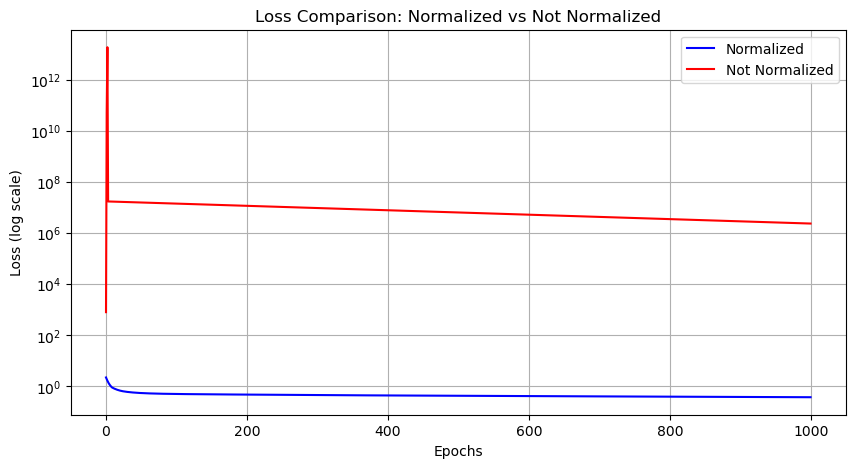

In [ ]:
# 데이터 정규화 적용 비적용 차이 시각화용 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df_train = pd.read_csv("hw2_dataset1_train.csv")
df_test = pd.read_csv("hw2_dataset1_test.csv")

x_label = list(df_train.columns[:-2])
y_label = list(df_train.columns[-2:])

X_train_raw = df_train[x_label].values
y_train_raw = df_train[y_label].values
X_test_raw = df_test[x_label].values

# 정규화 함수
def z_score_normalize(X, mean=None, std=None):
    if mean is None: mean = X.mean(axis=0)
    if std is None: std = X.std(axis=0)
    return (X - mean) / std, mean, std

# 모델 학습 함수
def train_ann(X_train, y_train, X_test, normalize=False):
    # 정규화할 경우, 평균/표준편차 계산 및 적용
    if normalize:
        X_train, X_mean, X_std = z_score_normalize(X_train)
        X_test = (X_test - X_mean) / X_std
        y_train, y_mean, y_std = z_score_normalize(y_train)
    else:
        X_mean = X_std = y_mean = y_std = None

    # 하이퍼파라미터
    input_size = X_train.shape[1]
    hidden1_size = 64
    hidden2_size = 32
    output_size = 2
    lr = 0.001
    epochs = 1000
    losses = []

    # He 초기화
    W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2 / input_size)
    b1 = np.zeros((1, hidden1_size))
    W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2 / hidden1_size)
    b2 = np.zeros((1, hidden2_size))
    W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2 / hidden2_size)
    b3 = np.zeros((1, output_size))

    # 활성화 함수
    def relu(x): return np.maximum(0, x)
    def relu_derivative(x): return (x > 0).astype(float)
    def mse_loss(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)

    # 학습
    for epoch in range(epochs):
        # 순전파
        z1 = np.dot(X_train, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = relu(z2)
        z3 = np.dot(a2, W3) + b3
        y_pred = z3

        # 손실 계산
        loss = mse_loss(y_train, y_pred)
        losses.append(loss)

        # 역전파
        dz3 = (y_pred - y_train) / len(y_train)
        dW3 = np.dot(a2.T, dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)
        da2 = np.dot(dz3, W3.T)
        dz2 = da2 * relu_derivative(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * relu_derivative(z1)
        dW1 = np.dot(X_train.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # 가중치 업데이트
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    # 테스트 데이터 예측
    z1_test = np.dot(X_test, W1) + b1
    a1_test = relu(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    a2_test = relu(z2_test)
    y_test_pred = np.dot(a2_test, W3) + b3

    # 정규화 복원
    if normalize:
        y_test_pred = y_test_pred * y_std + y_mean

    return losses, y_test_pred

# 모델 훈련: 정규화 / 비정규화
loss_norm, y_pred_norm = train_ann(X_train_raw.copy(), y_train_raw.copy(), X_test_raw.copy(), normalize=True)
loss_raw, y_pred_raw = train_ann(X_train_raw.copy(), y_train_raw.copy(), X_test_raw.copy(), normalize=False)

# 손실 시각화 (log scale 적용)
plt.figure(figsize=(10, 5))
plt.plot(loss_norm, label="Normalized", color='blue')
plt.plot(loss_raw, label="Not Normalized", color='red')
plt.yscale('log')  # 로그 스케일로 보정
plt.xlabel("Epochs")
plt.ylabel("Loss (log scale)")
plt.title("Loss Comparison: Normalized vs Not Normalized")
plt.legend()
plt.grid(True)
plt.show()

# 그래프 해석
## 빨간선에서 손실이 너무 커짐
* 10^90 수준의 손실이 발생했는데, 이는 Gradient Explosion 현상 때문
* 입력값들의 스케일이 너무 크거나 불균형하여, 순전파나 역전파 중에 값이 폭증하면서 학습이 망가진 것

Feature Scale Summary:
           min        max       mean        std
0.0   5.008514  96.051227  37.406482  20.325376
0.1   5.063511  96.326858  38.375898  20.636039
0.2   5.118492  96.577374  39.299416  20.956627
0.3   5.173445  96.804949  40.173503  21.281472
0.4   5.228356  97.011585  40.995884  21.605000
...        ...        ...        ...        ...
9.6   8.247626  98.999999  52.243393  26.334177
9.7   8.262691  98.999999  52.255625  26.337134
9.8   8.277736  98.999999  52.267620  26.340016
9.9   8.292760  98.999999  52.279385  26.342825
10.0  8.307764  98.999999  52.290928  26.345564

[101 rows x 4 columns]


<Figure size 1200x600 with 0 Axes>

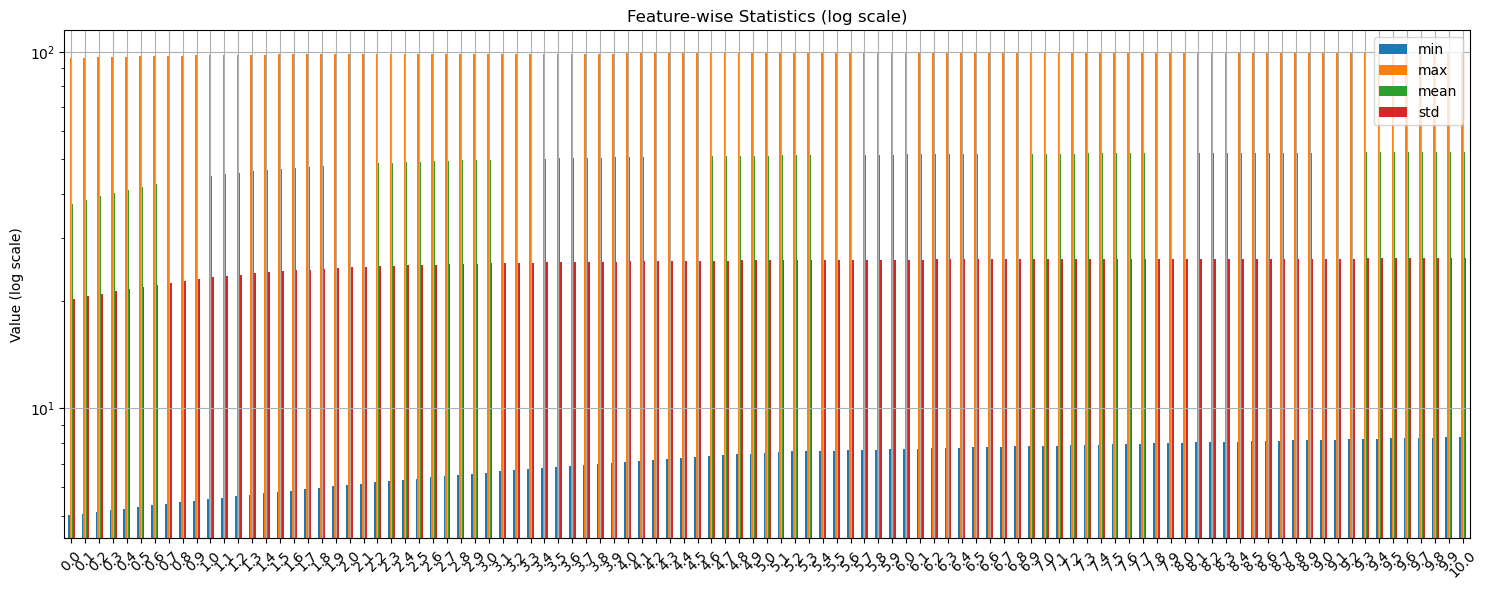

In [3]:
# Feature 스케일 분석용 코드
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df_train = pd.read_csv("hw2_dataset1_train.csv")

# 입력 특성만 추출
x_label = list(df_train.columns[:-2])
X = df_train[x_label]

# 통계 요약 확인
summary = pd.DataFrame({
    'min': X.min(),
    'max': X.max(),
    'mean': X.mean(),
    'std': X.std()
})

print("Feature Scale Summary:")
print(summary)

# 특성별 스케일 차이 시각화
plt.figure(figsize=(12, 6))
summary[['min', 'max', 'mean', 'std']].plot(kind='bar', figsize=(15, 6), logy=True)
plt.title("Feature-wise Statistics (log scale)")
plt.ylabel("Value (log scale)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 그래프 해석
* 일부 feature는 평균이 30대, 일부는 50대 → 중심 값이 다름
* 표준편차(분산 정도)도 20 vs 26 → 퍼짐도 서로 다름